# Guided Project #16 - Predicting House Sale Prices
By [Luis Munguia](http://www.linkedin.com/in/luis-munguia) and [Dataquest](http://www.dataquest.io)

In this guided project, I'll perform a Machine Learning workflow with Linear Regression:

* Transform Features
* Select Features
* Train and Test

The dataset is housing data for the city of Ames, Iowa, United States from 2006 to 2010.

## 1.- Library and Jupyter setup.
Import `pandas`, `matplotlib`, `numpy` and `scikit-learn` and create helper functions.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
houses = pd.read_table('AmesHousing.tsv')
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
houses.shape

(2930, 82)

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [5]:
def transform_features(df):
    return df

In [6]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [7]:
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    features = train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    
    lr.fit(train[features], train['SalePrice'])
    
    train_pre = lr.predict(train[features])
    test_pre = lr.predict(test[features])
    
    train_rmse = np.sqrt(mean_squared_error(train['SalePrice'], train_pre))
    test_rmse = np.sqrt(mean_squared_error(test['SalePrice'], test_pre))
    
    return train_rmse, test_rmse

In [8]:
transformed = transform_features(houses)
selected = select_features(transformed)
train_and_test(selected)

(56034.362001412796, 57088.25161263909)

## 2.- Feature Engineering.
Update `transform_features()` to:

* Remove features that won't be used in the model:
    * Drop columns with more than 5% missing values
    * Drop columns with data leakage (Sale or Sold)
    * Fill in missing values
* Transform features into the proper format:
    * Numerical to categorical
    * Scaling numerical 
    * Filling in missing values
* Create new features by comining others.

In [9]:
def transform_features(df):
    # This code will drop columns with more than 5% missing values.
    tdf = df[df.isnull().sum()[df.isnull().sum() < df.shape[0] / 20].index]
    # This code will drop columns with "Sold or Sale" (Except SalePrice)
    tdf = tdf.loc(axis=1)[tdf.columns.map(lambda x: not re.search('Sold', x))]
    tdf = tdf.loc(axis=1)[tdf.columns.map(lambda x: not re.search('Sale ', x))]
        
    return tdf

In [10]:
test0 = transform_features(houses)
test0.shape

(2930, 67)

In [11]:
test0.isnull().sum().value_counts()

0     51
1      7
80     3
23     2
2      2
83     1
81     1
dtype: int64

In [12]:
test0.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
                   ..
Total Bsmt SF       1
Heating             0
Heating QC          0
Central Air         0
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen Ab

In [13]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 67 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       29

In [14]:
test1 = test0.select_dtypes(['float', 'int'])
less_than_5 = test1.isnull().sum()[(test1.isnull().sum() < 2930 * .05) & (test1.isnull().sum() > 0)].index
less_than_5

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [15]:
test1[less_than_5].isnull().sum().sort_values()

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [16]:
replacement_dictionary = test1[less_than_5].mode().to_dict(orient='records')[0]

In [17]:
replacement_dictionary

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [18]:
test0 = test0.fillna(replacement_dictionary)

In [19]:
test0.isnull().sum().value_counts()

0     60
80     3
83     1
81     1
23     1
1      1
dtype: int64

In [20]:
drop_columns_null = test0.isnull().sum()[(test0.isnull().sum() > 0)].index

In [21]:
test0 = test0.drop(drop_columns_null, axis = 1)

In [22]:
test0.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,528.0,P,210,62,0,0,0,0,0,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,730.0,Y,140,0,0,0,120,0,0,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,312.0,Y,393,36,0,0,0,0,12500,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,522.0,Y,0,0,0,0,0,0,0,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,482.0,Y,212,34,0,0,0,0,0,189900


In [23]:
test0.shape

(2930, 60)

In [24]:
test0.isnull().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional   

In [25]:
test0['years_until_remod'] = test0['Year Remod/Add'] - test0['Year Built']

In [26]:
drop_rows_negative = test0[test0['years_until_remod'] < 0].index

In [27]:
test0 = test0.drop(drop_rows_negative, axis = 0)

In [28]:
test0.shape

(2929, 61)

In [29]:
test0 = test0.drop(['Year Remod/Add', 'Year Built'], axis = 1)

In [30]:
test0.shape

(2929, 59)

In [31]:
# This are the new steps.
test0 = transform_features(houses)
test1 = test0.select_dtypes(['float', 'int'])
less_than_5 = test1.isnull().sum()[(test1.isnull().sum() < 2930 * .05) & (test1.isnull().sum() > 0)].index
replacement_dictionary = test1[less_than_5].mode().to_dict(orient='records')[0]
test0 = test0.fillna(replacement_dictionary)
drop_columns_null = test0.isnull().sum()[(test0.isnull().sum() > 0)].index
test0 = test0.drop(drop_columns_null, axis = 1)
test0['years_until_remod'] = test0['Year Remod/Add'] - test0['Year Built']
drop_rows_negative = test0[test0['years_until_remod'] < 0].index
test0 = test0.drop(drop_rows_negative, axis = 0)
test0 = test0.drop(['Year Remod/Add', 'Year Built'], axis = 1)

# Use the following test to confirm the end result is the same.
test0.shape

(2929, 59)

In [32]:
# Modify the following code to include the steps from previous cell.
def transform_features(df):
    # This code will drop columns with more than 5% missing values.
    tdf = df[df.isnull().sum()[df.isnull().sum() < df.shape[0] / 20].index]
    # This code will drop columns with "Sold or Sale" (Except SalePrice)
    tdf = tdf.loc(axis=1)[tdf.columns.map(lambda x: not re.search('Sold', x))]
    tdf = tdf.loc(axis=1)[tdf.columns.map(lambda x: not re.search('Sale ', x))]
    # This code will replace NAN value with mode in columns with less than 5% missing numbers.
    temp = tdf.select_dtypes(['float', 'int'])
    less_than_5 = temp.isnull().sum()[(temp.isnull().sum() < 2930 * .05) & (temp.isnull().sum() > 0)].index
    replacement_dictionary = temp[less_than_5].mode().to_dict(orient='record')[0]
    tdf = tdf.fillna(replacement_dictionary)
    # This code will drop remaining columns 'Object' with more than 1 missing value.
    drop_columns_null = tdf.isnull().sum()[(tdf.isnull().sum() > 0)].index
    tdf = tdf.drop(drop_columns_null, axis = 1)
    # This code will create a new feature 'years_until_remod' from two columns that will be removed, and any negative values.
    tdf['years_until_remod'] = tdf['Year Remod/Add'] - tdf['Year Built']
    drop_rows_negative = tdf[tdf['years_until_remod'] < 0].index
    tdf = tdf.drop(drop_rows_negative, axis = 0)
    tdf = tdf.drop(['Year Remod/Add', 'Year Built'], axis = 1)
        
    return tdf

In [33]:
transformed_houses = transform_features(houses)
transformed_houses.shape

(2929, 59)

My code has been updated.

## 3.- Feature Selection.
Generate a correlation heatmap to see which features correlate strongly with `SalePrice`. Transform nominal columns into categorical data type with dummy columns.

In [34]:
correlations = transformed_houses.corr().abs().loc['SalePrice'].sort_values()
correlations

BsmtFin SF 2         0.006046
Misc Val             0.015683
Order                0.031342
3Ssn Porch           0.032235
Bsmt Half Bath       0.035794
Low Qual Fin SF      0.037651
Pool Area            0.068410
MS SubClass          0.085021
Overall Cond         0.101655
Screen Porch         0.112181
Kitchen AbvGr        0.119797
Enclosed Porch       0.128758
Bedroom AbvGr        0.143899
Bsmt Unf SF          0.183418
years_until_remod    0.240129
PID                  0.246665
Lot Area             0.266546
2nd Flr SF           0.269479
Bsmt Full Bath       0.275779
Half Bath            0.285159
Open Porch SF        0.312966
Wood Deck SF         0.327119
BsmtFin SF 1         0.433221
Fireplaces           0.474722
TotRms AbvGrd        0.495514
Mas Vnr Area         0.502223
Full Bath            0.545594
1st Flr SF           0.621671
Total Bsmt SF        0.632536
Garage Area          0.640126
Garage Cars          0.647801
Gr Liv Area          0.706801
Overall Qual         0.799268
SalePrice 

In [35]:
strong_corr = correlations[correlations > .25]

In [36]:
strong_corr

Lot Area          0.266546
2nd Flr SF        0.269479
Bsmt Full Bath    0.275779
Half Bath         0.285159
Open Porch SF     0.312966
Wood Deck SF      0.327119
BsmtFin SF 1      0.433221
Fireplaces        0.474722
TotRms AbvGrd     0.495514
Mas Vnr Area      0.502223
Full Bath         0.545594
1st Flr SF        0.621671
Total Bsmt SF     0.632536
Garage Area       0.640126
Garage Cars       0.647801
Gr Liv Area       0.706801
Overall Qual      0.799268
SalePrice         1.000000
Name: SalePrice, dtype: float64

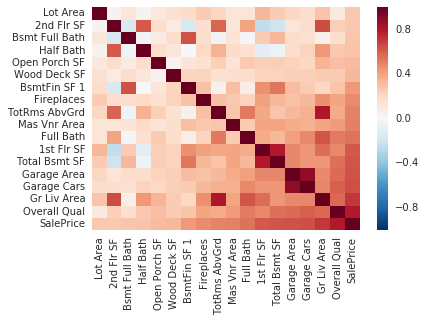

In [37]:
sns.heatmap(transformed_houses[strong_corr.index].corr())

In [38]:
# Remove columns with less than 25% correlation
transformed_houses = transformed_houses.drop(correlations[correlations < .25].index, axis = 1)

In [39]:
transformed_houses.shape

(2929, 43)

In [40]:
# Choose Nominal Features from the remaining columns.
for i in transformed_houses.columns:
    print(i)

MS Zoning
Lot Area
Street
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Overall Qual
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Area
Exter Qual
Exter Cond
Foundation
BsmtFin SF 1
Total Bsmt SF
Heating
Heating QC
Central Air
1st Flr SF
2nd Flr SF
Gr Liv Area
Bsmt Full Bath
Full Bath
Half Bath
Kitchen Qual
TotRms AbvGrd
Functional
Fireplaces
Garage Cars
Garage Area
Paved Drive
Wood Deck SF
Open Porch SF
SalePrice


In [41]:
nominal_columns = ['MS Zoning', 'Street', 'Land Contour','Lot Config',
                   'Neighborhood', 'Condition 1', 'Condition 2',
                   'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
                   'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating',
                   'Central Air']

In [42]:
more_than_95 = []
for i in nominal_columns:
    if transformed_houses[i].value_counts(normalize = True)[0] > .95 or len(transformed_houses[i].unique()) > 10:
        more_than_95.append(i)

In [43]:
# Drop columns with more than 95% in the same value

In [44]:
more_than_95

['Street',
 'Neighborhood',
 'Condition 2',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Heating']

In [45]:
for i in nominal_columns:
    print(transformed_houses[i].value_counts(normalize = True)[0])

0.7756913622396723
0.9959030385797201
0.898600204848071
0.7302833731649027
0.15124615909866848
0.8607033117104814
0.9897575964493001
0.8275862068965517
0.505291908501195
0.7920792079207921
0.9853192215773301
0.3499487879822465
0.34619324001365653
0.4469102082622055
0.9846363946739501
0.9330829634687606


In [46]:
transformed_houses = transformed_houses.drop(more_than_95, axis = 1)

In [47]:
transformed_houses.shape

(2929, 36)

In [48]:
dummy = transformed_houses.select_dtypes(include=['object'])

In [49]:
dummy

,MS Zoning,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Bldg Type,House Style,Roof Style,Exter Qual,Exter Cond,Foundation,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
0,RL,IR1,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,Hip,TA,TA,CBlock,Fa,Y,TA,Typ,P
1,RH,Reg,Lvl,AllPub,Inside,Gtl,Feedr,1Fam,1Story,Gable,TA,TA,CBlock,TA,Y,TA,Typ,Y
2,RL,IR1,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,Hip,TA,TA,CBlock,TA,Y,Gd,Typ,Y
3,RL,Reg,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,Hip,Gd,TA,CBlock,Ex,Y,Ex,Typ,Y
4,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,Gable,TA,TA,PConc,Gd,Y,TA,Typ,Y
5,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,Gable,TA,TA,PConc,Ex,Y,Gd,Typ,Y
6,RL,Reg,Lvl,AllPub,Inside,Gtl,Norm,TwnhsE,1Story,Gable,Gd,TA,PConc,Ex,Y,Gd,Typ,Y
7,RL,IR1,HLS,AllPub,Inside,Gtl,Norm,TwnhsE,1Story,Gable,Gd,TA,PConc,Ex,Y,Gd,Typ,Y
8,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,TwnhsE,1Story,Gable,Gd,TA,PConc,Ex,Y,Gd,Typ,Y
9,RL,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,Gable,TA,TA,PConc,Gd,Y,Gd,Typ,Y


In [50]:
transformed_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 2929
Data columns (total 36 columns):
MS Zoning         2929 non-null object
Lot Area          2929 non-null int64
Lot Shape         2929 non-null object
Land Contour      2929 non-null object
Utilities         2929 non-null object
Lot Config        2929 non-null object
Land Slope        2929 non-null object
Condition 1       2929 non-null object
Bldg Type         2929 non-null object
House Style       2929 non-null object
Overall Qual      2929 non-null int64
Roof Style        2929 non-null object
Mas Vnr Area      2929 non-null float64
Exter Qual        2929 non-null object
Exter Cond        2929 non-null object
Foundation        2929 non-null object
BsmtFin SF 1      2929 non-null float64
Total Bsmt SF     2929 non-null float64
Heating QC        2929 non-null object
Central Air       2929 non-null object
1st Flr SF        2929 non-null int64
2nd Flr SF        2929 non-null int64
Gr Liv Area       2929 non-null int6

In [51]:
for col in dummy:
    transformed_houses[col] = transformed_houses[col].astype('category')

In [52]:
transformed_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 2929
Data columns (total 36 columns):
MS Zoning         2929 non-null category
Lot Area          2929 non-null int64
Lot Shape         2929 non-null category
Land Contour      2929 non-null category
Utilities         2929 non-null category
Lot Config        2929 non-null category
Land Slope        2929 non-null category
Condition 1       2929 non-null category
Bldg Type         2929 non-null category
House Style       2929 non-null category
Overall Qual      2929 non-null int64
Roof Style        2929 non-null category
Mas Vnr Area      2929 non-null float64
Exter Qual        2929 non-null category
Exter Cond        2929 non-null category
Foundation        2929 non-null category
BsmtFin SF 1      2929 non-null float64
Total Bsmt SF     2929 non-null float64
Heating QC        2929 non-null category
Central Air       2929 non-null category
1st Flr SF        2929 non-null int64
2nd Flr SF        2929 non-null int64
Gr Liv

In [53]:
transformed_houses.shape

(2929, 36)

In [54]:
transformed_houses = pd.concat([
    transformed_houses, 
    pd.get_dummies(transformed_houses.select_dtypes(include=['category']))
], axis=1)

In [55]:
transformed_houses.shape

(2929, 128)

In [56]:
transformed_houses.head()

,MS Zoning,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Bldg Type,House Style,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,RL,31770,IR1,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,...,0,0,0,0,0,0,1,0,1,0
1,RH,11622,Reg,Lvl,AllPub,Inside,Gtl,Feedr,1Fam,1Story,...,0,0,0,0,0,0,1,0,0,1
2,RL,14267,IR1,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,...,0,0,0,0,0,0,1,0,0,1
3,RL,11160,Reg,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,...,0,0,0,0,0,0,1,0,0,1
4,RL,13830,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,...,0,0,0,0,0,0,1,0,0,1


In [57]:
for i in list(dummy.columns):
    del transformed_houses[i]

In [58]:
transformed_houses.shape

(2929, 110)

In [59]:
transformed_houses = transform_features(houses)
correlations = transformed_houses.corr().abs().loc['SalePrice'].sort_values()
transformed_houses = transformed_houses.drop(correlations[correlations < .25].index, axis = 1)
nominal_columns = ['MS Zoning', 'Street', 'Land Contour','Lot Config',
                   'Neighborhood', 'Condition 1', 'Condition 2',
                   'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
                   'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating',
                   'Central Air']
more_than_95 = []
for i in nominal_columns:
    if transformed_houses[i].value_counts(normalize = True)[0] > .95 or len(transformed_houses[i].unique()) > 10:
        more_than_95.append(i)
transformed_houses = transformed_houses.drop(more_than_95, axis = 1)
dummy = transformed_houses.select_dtypes(include=['object'])
for col in dummy:
    transformed_houses[col] = transformed_houses[col].astype('category')
    transformed_houses = pd.concat([transformed_houses, 
    pd.get_dummies(transformed_houses.select_dtypes(include=['category']))], axis=1)
    del transformed_houses[col]
transformed_houses.shape

(2929, 110)

In [60]:
# Update select_features()
def select_features(df, corr_coeficient = .25, percentage = .95, unique_values = 10):
    # This will drop all columns with correlation below .25
    correlations = df.corr().abs().loc['SalePrice'].sort_values()
    df = df.drop(correlations[correlations < corr_coeficient].index, axis = 1)
    # These are the nominal columns that will be filtered.
    nominal_columns = ['MS Zoning', 'Street', 'Land Contour','Lot Config',
                   'Neighborhood', 'Condition 1', 'Condition 2',
                   'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
                   'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating',
                   'Central Air']
    filtered_columns = []
    for i in nominal_columns:
        if df[i].value_counts(normalize = True)[0] > percentage or len(df[i].unique()) > 10:
            filtered_columns.append(i)
    df = df.drop(filtered_columns, axis = 1)
    # Categorical columns selection
    for col in df.select_dtypes(include = ['object']):
        df[col] = df[col].astype('category')
        df = pd.concat([df, pd.get_dummies(df.select_dtypes(include = ['category']))], axis = 1)
        del df[col]
        
    return df

In [61]:
t_houses = transform_features(houses)
s_houses = select_features(t_houses)
s_houses.shape

(2929, 110)

My code works.

## 4.- Train and Test.
Modify `train_and_test()` to implement k=0 holdout validation, k=1 simple cross validation or k>1 k-fold cross validation.

In [62]:
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    features = train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    
    lr.fit(train[features], train['SalePrice'])
    
    train_pre = lr.predict(train[features])
    test_pre = lr.predict(test[features])
    
    train_rmse = np.sqrt(mean_squared_error(train['SalePrice'], train_pre))
    test_rmse = np.sqrt(mean_squared_error(test['SalePrice'], test_pre))
    
    return train_rmse, test_rmse

In [63]:
x, y = train_and_test(s_houses)
print(x,y)

23596.78903632569 37816.69192391211


In [64]:
def train_and_test(df, k=0):
    
    if k == 0:
        train = df.iloc[:1460]
        test = df.iloc[1460:]
    
        features = train.columns.drop('SalePrice')
    
        lr = LinearRegression()
    
        lr.fit(train[features], train['SalePrice'])
    
        train_pre = lr.predict(train[features])
        test_pre = lr.predict(test[features])
    
        train_rmse = np.sqrt(mean_squared_error(train_pre, train['SalePrice']))
        test_rmse = np.sqrt(mean_squared_error(test_pre, test['SalePrice']))
        
        return test_rmse
    
    if k == 1:
        from sklearn.utils import shuffle
        df = shuffle(df)
        fold_one = df.iloc[:1460]
        fold_two = df.iloc[1460:]
        
        features = fold_one.columns.drop('SalePrice')
        
        lr = LinearRegression()
        
        lr.fit(fold_one[features], fold_one['SalePrice'])
        prediction1 = lr.predict(fold_two[features])
        rmse1 = np.sqrt(mean_squared_error(fold_two['SalePrice'],prediction1))
        
        lr.fit(fold_two[features], fold_two['SalePrice'])
        prediction2 = lr.predict(fold_one[features])
        rmse2 = np.sqrt(mean_squared_error(fold_one['SalePrice'], prediction2))
        
        return rmse1, rmse2, np.mean([rmse1, rmse2])
    
    else:
        from sklearn.model_selection import KFold, cross_val_score
        
        features = df.columns.drop('SalePrice')
        
        lr = LinearRegression()
        kf = KFold(n_splits = k, shuffle = True)
        mses = cross_val_score(lr, df[features], df['SalePrice'], scoring = 'neg_mean_squared_error',
                              cv = kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        
        return rmses, avg_rmse

In [65]:
x, y, z = train_and_test(s_houses,1)
print(x, y, z)

31676.70618079452 37132.49772673236 34404.60195376344


In [66]:
x, y = train_and_test(s_houses,4)
print(x, y)

[28905.93861261 30115.18070386 34189.27562695 32707.87307194] 31479.567003839213


## 5.- Next steps.
* Research some other approaches to features engineering online around housing data.
* Review other people's approaches.
* Better feature selection for categorical columns.

To be continued...